In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [2]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [3]:
verses_features

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.ROM.16.5,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.5
b.ROM.16.8,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.8
b.ROM.16.9,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.9


In [4]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [5]:
verses_features.head()

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.005


In [18]:
print("\n ".join([cat for cat in verses_features.columns.tolist()]))



verse_text
 bible_book
 bible_chapter
 bible_book_chapter
 relations
 monogamy
 poligamy
 marriage
 second-marriage
 second-marriage-divorce
 second-marriage-widow
 interfaith-marriage
 interfaith-relation
 non-marital-relation
 pre-marital-relation
 relation-greater-family
 marital-relation-political-family
 lord-servant-relation
 marital-relation-direct-family
 arranged-marriage
 divorce
 engaged
 love
 jealousy
 ascendant-descendant
 primogeniture
 intercultural-ascendant-descendant
 outside-marriage-ascendant-descendant
 indirect-ascendant-descendant
 homosexual-relation
 acts
 social-related-act
 wedding
 deception
 prostitute
 body-related-act
 massage
 kiss
 hug
 dance
 abortion
 circumcision
 breast-feeding
 bath
 wash
 sexual-act
 sexual-act-stage
 consent
 seduction
 rejection
 erotic-time
 initation-sexual-act
 orgasm
 ejaculation
 time-after-sex
 sexual-act-type
 coitus
 first-sexual-act
 coitus-interruptus
 self-masturbation
 masturbation
 sleep-orgasm
 oral-sex
 anal-sex


In [6]:
sexual_categories = verses_features.columns.tolist()[8:287]

In [7]:
sexual_categories

['second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'pre-marital-relation',
 'relation-greater-family',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'primogeniture',
 'intercultural-ascendant-descendant',
 'outside-marriage-ascendant-descendant',
 'indirect-ascendant-descendant',
 'homosexual-relation',
 'acts',
 'social-related-act',
 'wedding',
 'deception',
 'prostitute',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'bath',
 'wash',
 'sexual-act',
 'sexual-act-stage',
 'consent',
 'seduction',
 'rejection',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-mastur

In [8]:
structural_categories = [column for column in verses_features.columns.tolist() if "number " in column]

In [9]:
entitiy_categories = [column for column in verses_features.columns.tolist() if "#" in column]

In [10]:
verses_features.fillna(0, inplace=True)

In [11]:
verses_features.head()

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.005


In [12]:
verses_features["twitter_freq_sum_2014_2015"].plot.hist(bins= [0,1,10,100,1000,10000,100000,1000000], )

KeyError: 'twitter_freq_sum_2014_2015'

In [13]:
verses_features[["twitter_freq_sum_2014_2015"] + structural_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015")

KeyError: "['twitter_freq_sum_2014_2015'] not in index"

In [14]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

KeyError: "['twitter_freq_sum_2014_2015'] not in index"

In [15]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).tail(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
#per168,-0.004009,-0.000703,-0.016697,0.002752,-0.002126,-0.008730,-0.000857,-0.000606,-0.000426,-0.000574,...,-0.000130,-0.000130,-0.000130,0.099744,-0.000290,-0.000290,-0.000505,-0.002315,-0.000441,-0.000311
#per162,-0.004041,-0.000989,-0.004486,0.025839,-0.002990,-0.010085,-0.001204,-0.000852,-0.000599,-0.000807,...,-0.000182,-0.000182,-0.000182,-0.000408,-0.000408,-0.000408,-0.000710,-0.003255,-0.000620,-0.000437
#pla17,-0.004042,-0.000857,0.006326,-0.004425,-0.002590,0.001662,-0.001043,-0.000738,-0.000519,-0.000699,...,-0.000158,-0.000158,-0.000158,-0.000353,-0.000353,-0.000353,-0.000615,0.017660,-0.000537,-0.000379
#per158,-0.004102,-0.000974,-0.002350,0.021485,-0.002943,-0.009269,-0.001186,-0.000838,-0.000590,-0.000794,...,-0.000179,-0.000179,-0.000179,-0.000401,-0.000401,-0.000401,-0.000699,-0.003204,-0.000610,-0.000431
#pla81,-0.004563,-0.000798,-0.006982,-0.004120,-0.002411,0.005469,-0.000971,-0.000687,-0.000483,-0.000651,...,-0.000147,-0.000147,-0.000147,-0.000329,-0.000329,-0.000329,-0.000572,-0.002625,-0.000500,-0.000353
#org54,-0.004596,-0.000839,0.002465,-0.004335,-0.002537,-0.004179,-0.001022,-0.000723,-0.000508,-0.000685,...,-0.000155,-0.000155,-0.000155,-0.000346,-0.000346,-0.000346,-0.000602,-0.002762,-0.000526,-0.000371
#per144,-0.004642,-0.001069,-0.007019,0.021579,-0.003231,-0.011347,-0.001302,-0.000920,-0.000647,-0.000872,...,-0.000197,-0.000197,0.210752,-0.000440,-0.000440,-0.000440,-0.000767,-0.003518,-0.000670,-0.000473
#pla64,-0.004785,-0.000938,-0.000372,-0.004845,-0.002835,-0.010625,-0.001142,-0.000808,-0.000568,0.042301,...,-0.000173,-0.000173,-0.000173,-0.000386,-0.000386,-0.000386,-0.000673,0.010460,-0.000588,-0.000415
#pla23,-0.005012,-0.000976,0.019606,0.001468,-0.002951,0.005503,-0.001189,-0.000841,-0.000591,-0.000796,...,-0.000180,-0.000180,-0.000180,-0.000402,-0.000402,-0.000402,-0.000700,-0.003213,-0.000612,-0.000432
#org57,-0.005650,-0.000985,-0.008785,-0.005088,-0.002977,-0.009784,-0.001199,-0.000848,-0.000597,-0.000804,...,-0.000181,-0.000181,-0.000181,-0.000406,-0.000406,-0.000406,-0.000707,-0.003242,-0.000617,-0.000436


In [16]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,horse,donkey,cow,camel,plants,flowers,trees,palms,time,part-of-the-day
twitter_freq_sum_2014_2015,1.000000,-0.001859,-0.001189,-0.003564,-0.007083,-0.000946,NaN,-0.000670,-0.000574,-0.002258,...,-0.000902,-0.000835,-0.000835,-0.003082,NaN,-0.002691,-0.001247,-0.001386,NaN,NaN
love,0.054186,-0.001302,-0.001127,-0.002109,0.009044,-0.000797,NaN,-0.000460,-0.001722,-0.001029,...,0.069958,-0.000460,-0.000460,-0.001455,NaN,0.201720,0.098937,0.098937,NaN,NaN
flesh,0.026825,-0.000591,-0.000511,-0.000957,-0.002143,-0.000362,NaN,-0.000209,-0.000781,-0.000467,...,-0.000209,-0.000209,-0.000209,-0.000660,NaN,-0.000723,-0.000295,-0.000295,NaN,NaN
veil,0.014770,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
song,0.012846,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
body,0.012124,-0.000952,-0.000825,-0.001543,0.005924,-0.000583,NaN,-0.000337,-0.001260,-0.000753,...,-0.000337,-0.000337,-0.000337,-0.001065,NaN,0.026538,-0.000476,-0.000476,NaN,NaN
men,0.008979,0.396028,-0.000493,-0.000922,0.044925,-0.000348,NaN,-0.000201,-0.000753,-0.000450,...,-0.000201,-0.000201,-0.000201,-0.000636,NaN,-0.000697,-0.000284,-0.000284,NaN,NaN
homosexuals,0.004819,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
gay-sex,0.003957,-0.000158,-0.000137,-0.000256,-0.000572,-0.000097,NaN,-0.000056,-0.000209,-0.000125,...,-0.000056,-0.000056,-0.000056,-0.000176,NaN,-0.000193,-0.000079,-0.000079,NaN,NaN
homosexual-sex,0.003881,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN


In [17]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(100)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,horse,donkey,cow,camel,plants,flowers,trees,palms,time,part-of-the-day
twitter_freq_sum_2014_2015,1.000000,-0.001859,-0.001189,-0.003564,-0.007083,-0.000946,NaN,-0.000670,-0.000574,-0.002258,...,-0.000902,-0.000835,-0.000835,-0.003082,NaN,-0.002691,-0.001247,-0.001386,NaN,NaN
love,0.054186,-0.001302,-0.001127,-0.002109,0.009044,-0.000797,NaN,-0.000460,-0.001722,-0.001029,...,0.069958,-0.000460,-0.000460,-0.001455,NaN,0.201720,0.098937,0.098937,NaN,NaN
flesh,0.026825,-0.000591,-0.000511,-0.000957,-0.002143,-0.000362,NaN,-0.000209,-0.000781,-0.000467,...,-0.000209,-0.000209,-0.000209,-0.000660,NaN,-0.000723,-0.000295,-0.000295,NaN,NaN
veil,0.014770,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
song,0.012846,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trees,-0.001247,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,1.000000,-0.000064,NaN,NaN
house,-0.001261,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN
masturbation,-0.001313,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN
honey,-0.001321,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN


In [18]:
verses_features["twitter_freq_sum_2014_2015"].sort_values()

index
14634         0
12064         8
12076         9
11112         9
12065         9
          ...  
26674    299317
16460    328235
26136    331092
30435    360391
29455    875311
Name: twitter_freq_sum_2014_2015, Length: 31065, dtype: int64

In [19]:
verses_features.loc[verses_features["twitter_freq_sum_2014_2015"] == 1]

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75
index,,,,,,,,,,,,,,,,,,,,,


In [20]:
verses_features[verses_features["coitus"] > 0 ]["bible_identifier"].values.tolist()

['b.GEN.004.001',
 'b.GEN.004.017',
 'b.GEN.004.025',
 'b.GEN.016.002',
 'b.GEN.016.003',
 'b.GEN.016.004',
 'b.GEN.020.004',
 'b.GEN.024.016',
 'b.GEN.024.067',
 'b.GEN.026.010',
 'b.GEN.029.023',
 'b.GEN.029.030',
 'b.GEN.030.003',
 'b.GEN.030.004',
 'b.GEN.030.016',
 'b.GEN.034.002',
 'b.GEN.034.007',
 'b.GEN.035.022',
 'b.GEN.038.002',
 'b.GEN.038.016',
 'b.GEN.038.018',
 'b.GEN.039.007',
 'b.GEN.039.010',
 'b.GEN.039.012',
 'b.GEN.039.014',
 'b.GEN.039.015',
 'b.GEN.039.017',
 'b.GEN.039.018',
 'b.GEN.049.004',
 'b.LEV.015.018',
 'b.RUT.004.013',
 'b.1SA.001.019',
 'b.MAT.001.025',
 'b.MAT.019.005',
 'b.MAT.019.006',
 'b.JOH.008.004',
 'b.JOH.008.005']

In [21]:
verses_features["number of 1st level quotations"].sum()

18815.0

In [22]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

<AxesSubplot:>

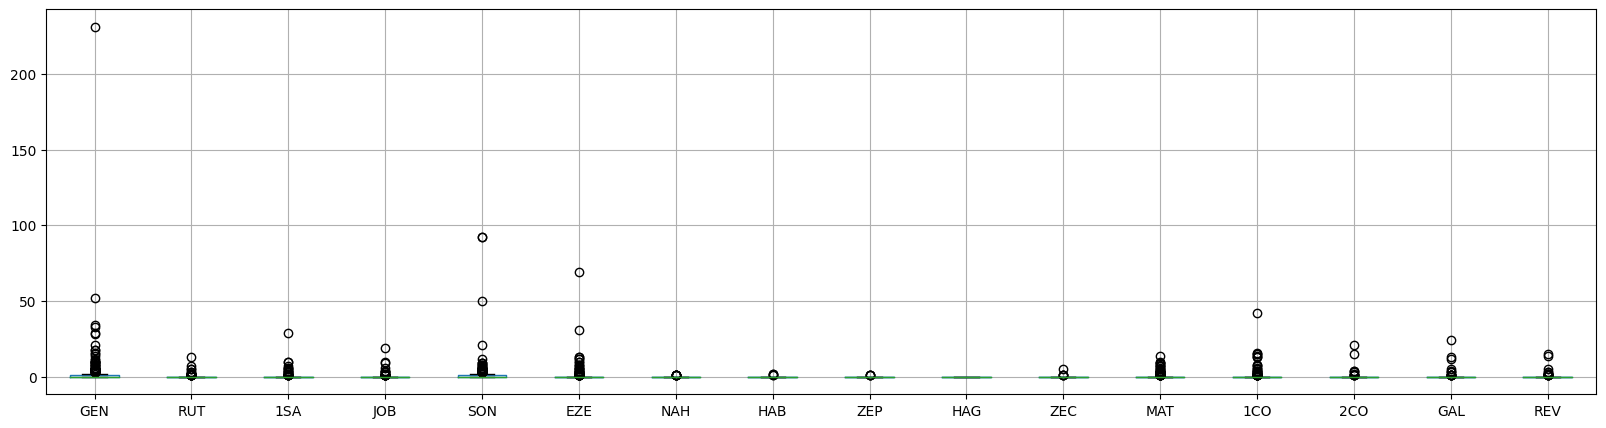

In [23]:
verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN","RUT","1SA","JOB", "SON","EZE" , "NAH",
"HAB",
"ZEP",
"HAG",
"ZEC",
"MAT", #"ROM",
"1CO",
"2CO",
"GAL",
"REV",]].boxplot(figsize=(20,5))

In [24]:
verses_features[sexual_categories].sum().sort_values()

part-of-the-day              0.0
sexual-act-participants      0.0
sexual-act-situation         0.0
other-sexual-act             0.0
voyerism                     0.0
                           ...  
body                       109.0
sex-outside-marriage       117.0
birth                      148.0
love                       203.0
ascendant-descendant       947.0
Length: 279, dtype: float64